In [61]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#importing metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [4]:
df = pd.read_csv("C:\\Users\\2211550\\OneDrive - Cognizant\\Desktop\\Kaggle Assignments\\Week 3\\tabular-playground-series-aug-2022\\train.csv")

In [5]:
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [7]:
df.sample(6)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
8284,8284,B,93.02,material_5,material_5,8,8,6,9,9,...,12.861,16.569,15.650,11.906,15.362,NaN,16.479,15.909,758.795,0
21929,21929,E,64.46,material_7,material_6,6,9,11,4,9,...,12.157,17.008,19.496,10.624,14.461,NaN,16.274,16.538,951.725,0
22040,22040,E,124.43,material_7,material_6,6,9,8,11,1,...,10.507,17.591,19.330,11.480,16.594,13.906,13.851,15.074,661.443,0
10455,10455,C,292.28,material_7,material_8,5,8,7,9,9,...,10.876,17.047,17.942,11.435,16.368,16.895,14.955,13.810,456.082,0
19794,19794,D,89.27,material_7,material_5,6,6,10,3,7,...,10.873,13.570,18.468,11.717,15.217,14.372,18.276,14.128,594.926,0
5089,5089,A,89.08,material_7,material_8,9,5,12,1,5,...,11.505,NaN,16.357,12.463,16.622,17.481,14.013,18.024,739.553,1


In [8]:
df['attribute_0'].unique()

array(['material_7', 'material_5'], dtype=object)

In [9]:
df['attribute_1'].unique()

array(['material_8', 'material_5', 'material_6'], dtype=object)

In [10]:
df['attribute_2'].unique()

array([9, 8, 5, 6], dtype=int64)

In [11]:
df['attribute_3'].unique()

array([5, 8, 6, 9], dtype=int64)

In [16]:
df['failure'].value_counts()

0    20921
1     5649
Name: failure, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [14]:
df.isna().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [17]:
df1=df.fillna(df.mean())

C:\Users\2211550\AppData\Local\Temp\9\ipykernel_49820\3725003345.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df.fillna(df.mean())


In [18]:
df1.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412,579.885,0


In [19]:
df1.isna().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='failure', ylabel='count'>

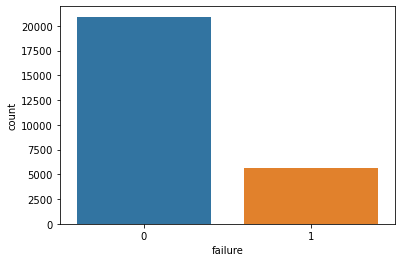

In [20]:
sns.countplot(df1['failure'])

In [22]:
df.shape

(26570, 26)

In [23]:
df1.shape

(26570, 26)

In [30]:
df2=df1.drop(["product_code","id"], axis=1)

In [31]:
df1

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,1,2,9,5,7,8,4,...,10.672000,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684000,764.100,0
1,1,A,84.89,1,2,9,5,14,3,3,...,12.448000,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631000,682.057,0
2,2,A,82.43,1,2,9,5,12,1,5,...,12.715000,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946000,663.376,0
3,3,A,101.07,1,2,9,5,13,2,6,...,12.471000,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172000,826.282,0
4,4,A,188.06,1,2,9,5,9,2,8,...,10.337000,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412000,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,1,1,6,9,6,16,4,...,11.430725,12.177,17.942000,10.112,15.795,18.572000,16.144,16.460727,729.131,0
26566,26566,E,146.02,1,1,6,9,10,12,8,...,11.242000,14.179,20.564000,10.234,14.450,14.322000,13.146,16.471000,853.924,0
26567,26567,E,115.62,1,1,6,9,1,10,1,...,11.407000,16.437,17.476000,8.668,15.069,16.599000,15.590,14.065000,750.364,0
26568,26568,E,106.38,1,1,6,9,2,9,4,...,11.392000,17.064,17.814000,14.928,16.273,15.485000,13.624,12.865000,730.156,0


In [32]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df1['attribute_0']= label_encoder.fit_transform(df1['attribute_0'])
  
df1['attribute_0'].unique()

array([1, 0], dtype=int64)

In [33]:
df1['attribute_0'].value_counts()

1    21320
0     5250
Name: attribute_0, dtype: int64

In [34]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df1['attribute_1']= label_encoder.fit_transform(df1['attribute_1'])
  
df1['attribute_1'].unique()

array([2, 0, 1], dtype=int64)

In [35]:
df1['attribute_1'].value_counts()

2    10865
0    10362
1     5343
Name: attribute_1, dtype: int64

<AxesSubplot:xlabel='product_code', ylabel='failure'>

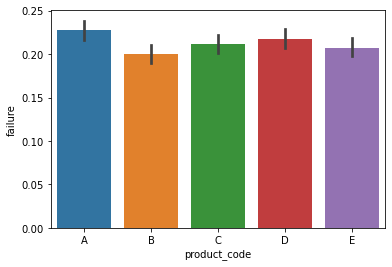

In [36]:
sns.barplot(data=df1, x="product_code", y="failure")

In [38]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df3 = min_max_scaling(df2)

In [39]:
df3.dtypes

loading           float64
attribute_0       float64
attribute_1       float64
attribute_2       float64
attribute_3       float64
measurement_0     float64
measurement_1     float64
measurement_2     float64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure           float64
dtype: object

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df3["failure"]
X = df3.drop("failure", axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
print(X)

        loading  attribute_0  attribute_1  attribute_2  attribute_3  \
0      0.133088          1.0          1.0         1.00          0.0   
1      0.146669          1.0          1.0         1.00          0.0   
2      0.139694          1.0          1.0         1.00          0.0   
3      0.192543          1.0          1.0         1.00          0.0   
4      0.439183          1.0          1.0         1.00          0.0   
...         ...          ...          ...          ...          ...   
26565  0.356649          1.0          0.5         0.25          1.0   
26566  0.319989          1.0          0.5         0.25          1.0   
26567  0.233796          1.0          0.5         0.25          1.0   
26568  0.207599          1.0          0.5         0.25          1.0   
26569  0.277970          1.0          0.5         0.25          1.0   

       measurement_0  measurement_1  measurement_2  measurement_3  \
0           0.241379       0.275862       0.166667       0.540698   
1        

In [57]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26565    0.0
26566    0.0
26567    0.0
26568    0.0
26569    0.0
Name: failure, Length: 26570, dtype: float64


In [58]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("y_train shape {}, len {}.".format(y_train.shape,len(y_train)))
print("y_test shape {}, len {}.".format(y_test.shape,len(y_test)))

X_train shape (18599, 23), len 18599.
X_test shape (7971, 23), len 7971.
y_train shape (18599,), len 18599.
y_test shape (7971,), len 7971.


In [62]:
# Create an instance of Logistic Regression
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7928741688621253
Precision: 0.4
Recall: 0.002425712553062462
F1 Score: 0.004822182037371911


In [71]:
df_0= pd.read_csv('C:\\Users\\2211550\\OneDrive - Cognizant\\Desktop\\Kaggle Assignments\\Week 3\\tabular-playground-series-aug-2022\\test.csv')

In [72]:
df_0.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [73]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  object 
 4   attribute_1     20775 non-null  object 
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20446 non-null  float64
 11  measurement_4   20366 non-null  float64
 12  measurement_5   20267 non-null  float64
 13  measurement_6   20151 non-null  float64
 14  measurement_7   20055 non-null  float64
 15  measurement_8   19929 non-null  float64
 16  measurement_9   19871 non-null  float64
 17  measurement_10  19708 non-null 

In [74]:
df_0.isna().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [79]:
df_1=df_0.fillna(df_0.mean())

C:\Users\2211550\AppData\Local\Temp\9\ipykernel_49820\1195982393.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1=df_0.fillna(df_0.mean())


In [80]:
df_0.isna().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [82]:
df_1.isna().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [83]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_1['attribute_0']= label_encoder.fit_transform(df_1['attribute_0'])
  
df_1['attribute_0'].unique()

array([0, 1])

In [84]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_1['attribute_1']= label_encoder.fit_transform(df_1['attribute_1'])
  
df_1['attribute_1'].unique()

array([1, 2, 0])

In [85]:
df_1 = df_1.drop(["product_code","id"], axis=1)

In [86]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df_1):
    # copy the dataframe
    df_norm = df_1.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_1 = min_max_scaling(df_1)

In [87]:
df_1

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.235347,0.0,0.5,0.0,0.0,0.200000,0.272727,0.214286,0.733640,0.339119,...,0.459242,0.429123,0.475224,0.418083,0.595983,0.356914,0.571138,0.389254,0.623389,0.509978
1,0.217926,0.0,0.5,0.0,0.0,0.366667,0.242424,0.000000,0.551892,0.551402,...,0.546241,0.592839,0.340523,0.483767,0.494862,0.662416,0.563192,0.464839,0.325405,0.431359
2,0.214045,0.0,0.5,0.0,0.0,0.266667,0.363636,0.142857,0.627556,0.375895,...,0.352017,0.554372,0.555368,0.419437,0.372957,0.333173,0.497250,0.632164,0.483895,0.529624
3,0.215655,0.0,0.5,0.0,0.0,0.266667,0.333333,0.357143,0.377428,0.425294,...,0.495065,0.560628,0.634243,0.256788,0.374981,0.504652,0.492496,0.307237,0.491328,0.477498
4,0.489551,0.0,0.5,0.0,0.0,0.466667,0.484848,0.285714,0.542306,0.644374,...,0.518582,0.637828,0.381406,0.399391,0.453449,0.550289,0.527538,0.358699,0.577139,0.644076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,0.307701,1.0,0.0,1.0,0.2,0.000000,0.121212,0.321429,0.626278,0.629445,...,0.449372,0.547451,0.490378,0.561956,0.423945,0.644610,0.456095,0.496491,0.534692,0.559815
20771,0.105873,1.0,0.0,1.0,0.2,0.133333,0.242424,0.250000,0.681876,0.304891,...,0.369441,0.452815,0.483541,0.217119,0.579791,0.504090,0.467301,0.394371,0.523538,0.492765
20772,0.086325,1.0,0.0,1.0,0.2,0.333333,0.333333,0.071429,0.650690,0.527167,...,0.578165,0.380407,0.491295,0.633088,0.390627,0.586301,0.482852,0.420906,0.624876,0.629819
20773,0.254262,1.0,0.0,1.0,0.2,0.266667,0.484848,0.392857,0.379729,0.466319,...,0.571463,0.678025,0.440897,0.538696,0.249338,0.529997,0.610390,0.586257,0.414354,0.599090


In [89]:
final = model.predict(df_1)

In [90]:
final

array([0., 0., 0., ..., 0., 0., 0.])